# Загрузка библиотек

In [ ]:
!pip install OSMPythonTools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 4.1 MB/s eta 0:00:00
  Created wheel for OSMPythonTools: filename=OSMPythonTools-0.3.5-py3-none-any.whl size=32716 sha256=97baf61e5ae75808b5ec801642c85b4ff662532b383d8d739acea472ab3ba9a8
  Stored in directory: /root/.cache/pip/wheels/5d/78/02/024bd457b96712ca4e0b02b194ff1998883857e102715f5a88
Successfully built OSMPythonTools


In [ ]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import base64
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
import time
import requests
import joblib
import matplotlib.pyplot as plt


from transformers import  AutoProcessor, AutoModel, pipeline
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset
from PIL import Image
from io import BytesIO
from torchvision import models
from torch.utils.data import DataLoader, Dataset
from tqdm.autonotebook import tqdm, trange
from google.colab import files
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/hack_data.zip

Archive:  /content/drive/MyDrive/hack_data.zip
   creating: data/
  inflating: data/EKB_images.csv     
  inflating: data/EKB_places.csv     
  inflating: data/NN_images.csv      
  inflating: data/NN_places.csv      
  inflating: data/Vladimir_images.csv  
  inflating: data/Vladimir_places.csv  
  inflating: data/yaroslavl_images.csv  
  inflating: data/Yaroslavl_places.csv  


# Анализ данных


## ЕКБ

In [ ]:
EKB_images_df = pd.read_csv('/content/data/EKB_images.csv')
EKB_places_df = pd.read_csv('/content/data/EKB_places.csv')

In [ ]:
EKB_images_df = EKB_images_df.rename(columns={'name': 'Name'})

In [ ]:
EKB_images_df.head()

,Name,image
0,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
1,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
2,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
3,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
4,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...


In [ ]:
EKB_images_df.shape

(3278, 2)

In [ ]:
EKB_images_df['Name'].unique()

array(['Динамо', '№32 Дом обороны', 'Дом обороны',
       '№28 Здание городской электростанции «Луч»',
       '№27 Дом Г.Н. Скрябина', 'Литературная жизнь Урала XX века',
       'Дом-музей Бажова', 'Театр кукол', 'Харитоновский сад',
       'Храм в честь Вознесения Господня', 'Суворовское училище',
       'Свято-Троицкий Кафедральный собор',
       'Дом-музей Д. Н. Мамина-Сибиряка',
       'Художественный Музей Эрнста Неизвестного', 'Серго Орджоникидзе',
       'Н. И. Кузнецову', 'Успенский собор на ВИЗе', 'Царский мост',
       'Дом печати (Екатеринбург)', 'Музей изобразительных искусств',
       'Александро-Невский собор', 'Здание бывшей гостиницы "Мадрид"',
       'Екатеринбургский музей изобразительных искусств',
       'Уральский государственный медицинский университет',
       'Центральный стадион', 'Уральская государственная консерватория',
       '№18 Фотографический музей «Дом Метенкова»',
       'Преображенская церковь на Уктусе',
       'Уральский геологический музей', 'Дом 

In [ ]:
grouped_df = EKB_images_df.groupby('Name').size()

grouped_df.to_frame()

,0
Name,
Александро-Невская часовня,29
Александро-Невский собор,27
Белая башня,39
Водонапорная башня,39
Второй Дом Советов,30
...,...
№27 Дом Г.Н. Скрябина,28
№28 Здание городской электростанции «Луч»,26
№29 Дом В.И. Чувильдина,30


In [ ]:
EKB_places_df.head()

,XID,Name,Kind,City,OSM,WikiData,Rate,Lon,Lat
0,W38411380,Динамо,"sport,architecture,historic_architecture,inter...",Екатеринбург,way/38411380,Q37996725,3h,60.600349,56.845398
1,N2885181131,№32 Дом обороны,"architecture,historic_architecture,interesting...",Екатеринбург,node/2885181131,Q55209768,3h,60.601315,56.834167
2,W38581890,Дом обороны,"architecture,historic_architecture,interesting...",Екатеринбург,way/38581890,Q55209768,3h,60.602409,56.835133
3,N1930476141,№28 Здание городской электростанции «Луч»,"architecture,historic_architecture,interesting...",Екатеринбург,node/1930476141,Q55154121,3h,60.607430,56.833691
4,N3002726097,№27 Дом Г.Н. Скрябина,"architecture,historic_architecture,interesting...",Екатеринбург,node/3002726097,Q55232375,3h,60.607075,56.834225


In [ ]:
full_EKB_df = pd.merge(EKB_images_df, EKB_places_df, on='Name', how='inner')

In [ ]:
full_EKB_df

,Name,image,XID,Kind,City,OSM,WikiData,Rate,Lon,Lat
0,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W38411380,"sport,architecture,historic_architecture,inter...",Екатеринбург,way/38411380,Q37996725,3h,60.600349,56.845398
1,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W38411380,"sport,architecture,historic_architecture,inter...",Екатеринбург,way/38411380,Q37996725,3h,60.600349,56.845398
2,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W38411380,"sport,architecture,historic_architecture,inter...",Екатеринбург,way/38411380,Q37996725,3h,60.600349,56.845398
3,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W38411380,"sport,architecture,historic_architecture,inter...",Екатеринбург,way/38411380,Q37996725,3h,60.600349,56.845398
4,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W38411380,"sport,architecture,historic_architecture,inter...",Екатеринбург,way/38411380,Q37996725,3h,60.600349,56.845398
...,...,...,...,...,...,...,...,...,...,...
3503,Дом связи (Екатеринбург),/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q55210808,"historic_architecture,architecture,interesting...",Екатеринбург,NaN,Q55210808,3h,60.608856,56.839352
3504,Дом связи (Екатеринбург),/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q55210808,"historic_architecture,architecture,interesting...",Екатеринбург,NaN,Q55210808,3h,60.608856,56.839352
3505,Дом связи (Екатеринбург),/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q55210808,"historic_architecture,architecture,interesting...",Екатеринбург,NaN,Q55210808,3h,60.608856,56.839352
3506,Дом связи (Екатеринбург),/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q55210808,"historic_architecture,architecture,interesting...",Екатеринбург,NaN,Q55210808,3h,60.608856,56.839352


In [ ]:
full_EKB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      3508 non-null   object 
 1   image     3508 non-null   object 
 2   XID       3508 non-null   object 
 3   Kind      3508 non-null   object 
 4   City      3508 non-null   object 
 5   OSM       2782 non-null   object 
 6   WikiData  3508 non-null   object 
 7   Rate      3508 non-null   object 
 8   Lon       3508 non-null   float64
 9   Lat       3508 non-null   float64
dtypes: float64(2), object(8)
memory usage: 274.2+ KB


In [ ]:
grouped_df = full_EKB_df.groupby('Name').size()

grouped_df.to_frame()

,0
Name,
Александро-Невская часовня,29
Александро-Невский собор,27
Белая башня,39
Водонапорная башня,39
Второй Дом Советов,30
...,...
№27 Дом Г.Н. Скрябина,28
№28 Здание городской электростанции «Луч»,26
№29 Дом В.И. Чувильдина,30


In [ ]:
# filtered_df = full_EKB_df[full_EKB_df['Name'] == 'Александро-Невская часовня']

# images_to_show = [Image.open(BytesIO(base64.b64decode(bs4_url))).convert("RGB") for bs4_url in filtered_df['image']]

# for img in images_to_show:
#     plt.imshow(img)
#     plt.axis("off")
#     plt.show()


## НН

In [ ]:
NN_images_df = pd.read_csv('/content/data/NN_images.csv')
NN_places_df = pd.read_csv('/content/data/NN_places.csv')

In [ ]:
NN_images_df  = NN_images_df .rename(columns={'name': 'Name'})

In [ ]:
NN_images_df.head()

,Name,image
0,Дом В. И. Смирнова,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
1,Дом В. И. Смирнова,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
2,Дом В. И. Смирнова,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
3,Дом В. И. Смирнова,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
4,Дом В. И. Смирнова,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...


In [ ]:
NN_images_df.shape

(3468, 2)

In [ ]:
NN_images_df['Name'].unique()

array(['Дом В. И. Смирнова', 'Памятник Ленину', 'Северная башня',
       'Никольская башня', 'Дом архитектора',
       'Нижегородский государственный академический театр драмы им. М. Горького',
       'Нижегородский кремль', 'Нижегородская соборная мечеть',
       'Домик Каширина', 'Автозаводский парк культуры и отдыха',
       'Собор Александра Невского', 'Собор Архангела Михаила',
       'Церковь в честь Рождества Богородицы',
       'Спасо-преображенская церковь', 'Дворец вице-губернатора',
       'Парк имени Кулибина', 'Церковь Воскресения Христова',
       'Храм Сергия Радонежского', 'Храм святителей Московских', 'Скоба',
       'Нижегородский Кремль', 'Дмитриевская башня', 'Лицей № 82',
       'Часовая башня', 'Горьковчане фронту',
       'Нижегородский государственный художественный музей',
       'Рождественская церковь', 'Дмитровская башня',
       'Музей-квартира А.М. Горького', 'Благовещенский монастырь',
       'Благовещенский собор', 'Нижегородское речное училище',
       

In [ ]:
grouped_df = NN_images_df.groupby('Name').size()

grouped_df.to_frame()

,0
Name,
Автозаводский парк культуры и отдыха,29
Администрация Нижнего Новгорода,29
Белая башня,30
Благовещенский монастырь,42
Благовещенский собор,58
...,...
Часовая башня,30
Чкаловская лестница,81
Чкаловская лестница,41


In [ ]:
NN_places_df.head()

,XID,Name,Kind,City,OSM,WikiData,Rate,Lon,Lat
0,W148138980,Дом В. И. Смирнова,"architecture,historic_architecture,interesting...",Нижний Новгород,way/148138980,Q97660371,3h,43.975361,56.314426
1,W159088287,Памятник Ленину,"historic,monuments_and_memorials,urban_environ...",Нижний Новгород,way/159088287,Q55655312,3h,43.959465,56.326092
2,R2906507,Северная башня,"towers,architecture,interesting_places,other_t...",Нижний Новгород,relation/2906507,Q51946123,3h,43.998028,56.328777
3,R2906504,Никольская башня,"towers,architecture,fortifications,historic,in...",Нижний Новгород,relation/2906504,Q51885222,3h,44.001396,56.325672
4,W152110796,Дом архитектора,"cultural,museums,interesting_places,other_museums",Нижний Новгород,way/152110796,Q98381215,3h,44.009949,56.329483


In [ ]:
full_NN_df = pd.merge(NN_images_df, NN_places_df, on='Name', how='inner')

In [ ]:
full_NN_df

,Name,image,XID,Kind,City,OSM,WikiData,Rate,Lon,Lat
0,Дом В. И. Смирнова,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W148138980,"architecture,historic_architecture,interesting...",Нижний Новгород,way/148138980,Q97660371,3h,43.975361,56.314426
1,Дом В. И. Смирнова,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W148138980,"architecture,historic_architecture,interesting...",Нижний Новгород,way/148138980,Q97660371,3h,43.975361,56.314426
2,Дом В. И. Смирнова,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W148138980,"architecture,historic_architecture,interesting...",Нижний Новгород,way/148138980,Q97660371,3h,43.975361,56.314426
3,Дом В. И. Смирнова,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W148138980,"architecture,historic_architecture,interesting...",Нижний Новгород,way/148138980,Q97660371,3h,43.975361,56.314426
4,Дом В. И. Смирнова,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W148138980,"architecture,historic_architecture,interesting...",Нижний Новгород,way/148138980,Q97660371,3h,43.975361,56.314426
...,...,...,...,...,...,...,...,...,...,...
3600,Дом культуры ГУВД (Нижний Новгород),/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4165515,"historic_architecture,architecture,interesting...",Нижний Новгород,NaN,Q4165515,3h,43.988495,56.316048
3601,Дом культуры ГУВД (Нижний Новгород),/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4165515,"historic_architecture,architecture,interesting...",Нижний Новгород,NaN,Q4165515,3h,43.988495,56.316048
3602,Дом культуры ГУВД (Нижний Новгород),/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4165515,"historic_architecture,architecture,interesting...",Нижний Новгород,NaN,Q4165515,3h,43.988495,56.316048
3603,Дом культуры ГУВД (Нижний Новгород),/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4165515,"historic_architecture,architecture,interesting...",Нижний Новгород,NaN,Q4165515,3h,43.988495,56.316048


In [ ]:
full_NN_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      3605 non-null   object 
 1   image     3605 non-null   object 
 2   XID       3605 non-null   object 
 3   Kind      3605 non-null   object 
 4   City      3605 non-null   object 
 5   OSM       3032 non-null   object 
 6   WikiData  3605 non-null   object 
 7   Rate      3605 non-null   object 
 8   Lon       3605 non-null   float64
 9   Lat       3605 non-null   float64
dtypes: float64(2), object(8)
memory usage: 281.8+ KB


In [ ]:
grouped_df = full_NN_df.groupby('Name').size()

grouped_df.to_frame()

,0
Name,
Автозаводский парк культуры и отдыха,29
Администрация Нижнего Новгорода,29
Белая башня,30
Благовещенский монастырь,42
Благовещенский собор,58
...,...
Часовая башня,30
Чкаловская лестница,162
Чкаловская лестница,41


## Владимир

In [ ]:
Vladimir_images_df = pd.read_csv('/content/data/Vladimir_images.csv')
Vladimir_places_df = pd.read_csv('/content/data/Vladimir_places.csv')

In [ ]:
Vladimir_images_df = Vladimir_images_df.rename(columns={'name': 'Name'})

In [ ]:
Vladimir_images_df.head()

,Name,image
0,Церковь Никиты Великомученика,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
1,Церковь Никиты Великомученика,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
2,Церковь Никиты Великомученика,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
3,Церковь Никиты Великомученика,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
4,Церковь Никиты Великомученика,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...


In [ ]:
Vladimir_images_df.shape

(3498, 2)

In [ ]:
Vladimir_images_df['Name'].unique()

array(['Церковь Никиты Великомученика', 'Авиамеханический колледж',
       'Собор Успения Пресвятой Богородицы', 'Троицкая церковь',
       'Дом-музей Столетовых', 'Исторический музей',
       'Князь-Владимирская церковь',
       'Владимирский академический областной драматический театр',
       'Здание Присутственных мест. "Палаты"',
       'Бывшая водонапорная башня',
       'Костел Святого Розария Пресвятой Девы Марии Римско-Католической Церкви',
       'Дмитриевский собор',
       'Богородице-Рождественский мужской монастырь',
       'Успенский Княгинин монастырь', 'Золотые ворота',
       'Владимирский централ',
       'Владимирский государственный гуманитарный университет',
       'Владимирское духовное училище',
       'Белокаменные памятники Владимира и Суздаля',
       'Владимирский планетарий', 'Храм Казанской иконы Божией Матери',
       'Здание городской думы', 'Музей ложки',
       'Князь-Владимирское кладбище', 'Владимирская митрополия',
       'Владимиро-Суздальский музе

In [ ]:
grouped_df = Vladimir_images_df.groupby('Name').size()

grouped_df.to_frame()

,0
Name,
1941-1945,30
2000 летию Рождества Христова,58
église arménienne de Vladimir,29
Авиамеханический колледж,30
Аптекарь,28
...,...
Церковь Александра Невского при мужской гимназии,30
Церковь Никиты Великомученика,57
Церковь Рождества Христова,29


In [ ]:
Vladimir_places_df.head()

,XID,Name,Kind,City,OSM,WikiData,Rate,Lon,Lat
0,W129207551,Церковь Никиты Великомученика,"religion,churches,interesting_places,eastern_o...",Владимир,way/129207551,Q18331765,3h,40.397797,56.130745
1,R7140571,Авиамеханический колледж,"architecture,historic_architecture,interesting...",Владимир,relation/7140571,Q18786015,3h,40.387318,56.126278
2,R5606302,Собор Успения Пресвятой Богородицы,"religion,cathedrals,churches,interesting_place...",Владимир,relation/5606302,Q775487,3h,40.409214,56.127438
3,W131632302,Троицкая церковь,"religion,churches,interesting_places,eastern_o...",Владимир,way/131632302,Q9187382,3h,40.396076,56.126453
4,N1923952002,Дом-музей Столетовых,"biographical_museums,historic_house_museums,cu...",Владимир,node/1923952002,Q107422934,3h,40.413654,56.132446


In [ ]:
full_Vladimir_df = pd.merge(Vladimir_images_df, Vladimir_places_df, on='Name', how='inner')

In [ ]:
full_Vladimir_df

,Name,image,XID,Kind,City,OSM,WikiData,Rate,Lon,Lat
0,Церковь Никиты Великомученика,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W129207551,"religion,churches,interesting_places,eastern_o...",Владимир,way/129207551,Q18331765,3h,40.397797,56.130745
1,Церковь Никиты Великомученика,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W129207551,"religion,churches,interesting_places,eastern_o...",Владимир,way/129207551,Q18331765,3h,40.397797,56.130745
2,Церковь Никиты Великомученика,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W129207551,"religion,churches,interesting_places,eastern_o...",Владимир,way/129207551,Q18331765,3h,40.397797,56.130745
3,Церковь Никиты Великомученика,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W129207551,"religion,churches,interesting_places,eastern_o...",Владимир,way/129207551,Q18331765,3h,40.397797,56.130745
4,Церковь Никиты Великомученика,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W129207551,"religion,churches,interesting_places,eastern_o...",Владимир,way/129207551,Q18331765,3h,40.397797,56.130745
...,...,...,...,...,...,...,...,...,...,...
3761,Владимирским железнодорожникам погибшим в ВОВ,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,N3807490550,"historic,burial_places,interesting_places,war_...",Владимир,node/3807490550,NaN,1,40.421490,56.130661
3762,Владимирским железнодорожникам погибшим в ВОВ,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,N3807490550,"historic,burial_places,interesting_places,war_...",Владимир,node/3807490550,NaN,1,40.421490,56.130661
3763,Владимирским железнодорожникам погибшим в ВОВ,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,N3807490550,"historic,burial_places,interesting_places,war_...",Владимир,node/3807490550,NaN,1,40.421490,56.130661
3764,Владимирским железнодорожникам погибшим в ВОВ,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,N3807490550,"historic,burial_places,interesting_places,war_...",Владимир,node/3807490550,NaN,1,40.421490,56.130661


In [ ]:
full_NN_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      3605 non-null   object 
 1   image     3605 non-null   object 
 2   XID       3605 non-null   object 
 3   Kind      3605 non-null   object 
 4   City      3605 non-null   object 
 5   OSM       3032 non-null   object 
 6   WikiData  3605 non-null   object 
 7   Rate      3605 non-null   object 
 8   Lon       3605 non-null   float64
 9   Lat       3605 non-null   float64
dtypes: float64(2), object(8)
memory usage: 281.8+ KB


In [ ]:
grouped_df = full_Vladimir_df.groupby('Name').size()

grouped_df.to_frame()

,0
Name,
1941-1945,30
2000 летию Рождества Христова,58
église arménienne de Vladimir,29
Авиамеханический колледж,30
Аптекарь,28
...,...
Церковь Александра Невского при мужской гимназии,30
Церковь Никиты Великомученика,57
Церковь Рождества Христова,29


## Ярославль

In [ ]:
Yaroslavl_images_df = pd.read_csv('/content/data/yaroslavl_images.csv')
Yaroslavl_places_df = pd.read_csv('/content/data/Yaroslavl_places.csv')

In [ ]:
Yaroslavl_images_df = Yaroslavl_images_df.rename(columns={'name': 'Name', 'img':'image'})

In [ ]:
Yaroslavl_images_df.head()

,Name,image
0,Cerkiew Narodzenia Pańskiego w Jarosławiu,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
1,Cerkiew Narodzenia Pańskiego w Jarosławiu,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
2,Cerkiew Narodzenia Pańskiego w Jarosławiu,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
3,Cerkiew Narodzenia Pańskiego w Jarosławiu,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...
4,Cerkiew Narodzenia Pańskiego w Jarosławiu,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...


In [ ]:
Yaroslavl_images_df.shape

(4372, 2)

In [ ]:
Yaroslavl_images_df['Name'].unique()

array(['Cerkiew Narodzenia Pańskiego w Jarosławiu',
       'Cerkiew Włodzimierskiej Ikony Matki Bożej w Jarosławiu',
       'Cerkiew św. Dymitra Sołuńskiego w Jarosławiu',
       'Автомеханический техникум', 'Беседка на Волжской набережной',
       'Богоявленская башня', 'Больница имени Н. В. Соловьёва',
       'Бутусовский посёлок', 'Вечный огонь (Ярославль)',
       'Владимирская церковь', 'Власьевская (Знаменская) башня',
       'Власьевский сквер', 'Воинское мемориальное кладбище',
       'Волжская башня', 'Выставочный зал имени Нужина', 'Г.М. Димитрову',
       'Городам побратимам', 'Гостиный двор (Ярославль)',
       'Губернаторский дом (Ярославль)', 'Демидовский сад',
       'Демидовский столп (Ярославль)', 'Дом Болконского', 'Дом муз',
       'Дом-музей Максима Богдановича', 'Знаменская церковь',
       'Исторический центр Ярославля', 'Казанский женский монастырь',
       'Кирило-Афанасиевский мужской монастырь',
       'Колокольня Никитского прихода', 'Крестоборогодская церков

In [ ]:
grouped_df = Yaroslavl_images_df.groupby('Name').size()

grouped_df.to_frame()

,0
Name,
Cerkiew Narodzenia Pańskiego w Jarosławiu,29
Cerkiew Włodzimierskiej Ikony Matki Bożej w Jarosławiu,59
Cerkiew św. Dymitra Sołuńskiego w Jarosławiu,57
Автомеханический техникум,56
Беседка на Волжской набережной,57
...,...
церковь Иоанна Предтечи в Толчкове,60
церковь Михаила Архангела,40
церковь Николая Чудотворца,59


In [ ]:
Yaroslavl_places_df.head()

,XID,Name,Kind,City,OSM,WikiData,Rate,Lon,Lat
0,N552713468,Н.А. Некрасову,"historic,monuments_and_memorials,interesting_p...",Ярославль,node/552713468,Q4343284,3h,39.892933,57.632572
1,W125448768,Российский государственный академический театр...,"cultural,theatres_and_entertainments,interesti...",Ярославль,way/125448768,Q4398052,3h,39.884796,57.627155
2,W239408057,Ярославская соборная мечеть,"religion,other_temples,interesting_places",Ярославль,way/239408057,Q4281966,3h,39.875633,57.636059
3,W44896191,Церковь Спаса на городу,"religion,churches,interesting_places,eastern_o...",Ярославль,way/44896191,Q16715792,3h,39.895622,57.622604
4,W617228287,Спасо-Преображенский монастырь,"religion,monasteries,interesting_places",Ярославль,way/617228287,Q1078595,3h,39.889442,57.621704


In [ ]:
Yaroslavl_places_df[Yaroslavl_places_df['Name'] == 'Cerkiew Narodzenia Pańskiego w Jarosławiu']

,XID,Name,Kind,City,OSM,WikiData,Rate,Lon,Lat
82,Q28058985,Cerkiew Narodzenia Pańskiego w Jarosławiu,"religion,churches,interesting_places,eastern_o...",Ярославль,NaN,Q28058985,3,39.89436,57.630562


In [ ]:
full_Yaroslavl_df = pd.merge(Yaroslavl_images_df, Yaroslavl_places_df, on='Name', how='inner')

In [ ]:
full_Yaroslavl_df

,Name,image,XID,Kind,City,OSM,WikiData,Rate,Lon,Lat
0,Cerkiew Narodzenia Pańskiego w Jarosławiu,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q28058985,"religion,churches,interesting_places,eastern_o...",Ярославль,NaN,Q28058985,3,39.894360,57.630562
1,Cerkiew Narodzenia Pańskiego w Jarosławiu,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q28058985,"religion,churches,interesting_places,eastern_o...",Ярославль,NaN,Q28058985,3,39.894360,57.630562
2,Cerkiew Narodzenia Pańskiego w Jarosławiu,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q28058985,"religion,churches,interesting_places,eastern_o...",Ярославль,NaN,Q28058985,3,39.894360,57.630562
3,Cerkiew Narodzenia Pańskiego w Jarosławiu,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q28058985,"religion,churches,interesting_places,eastern_o...",Ярославль,NaN,Q28058985,3,39.894360,57.630562
4,Cerkiew Narodzenia Pańskiego w Jarosławiu,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q28058985,"religion,churches,interesting_places,eastern_o...",Ярославль,NaN,Q28058985,3,39.894360,57.630562
...,...,...,...,...,...,...,...,...,...,...
4367,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852
4368,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852
4369,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852
4370,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852


In [ ]:
full_Yaroslavl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      4372 non-null   object 
 1   image     4372 non-null   object 
 2   XID       4372 non-null   object 
 3   Kind      4372 non-null   object 
 4   City      4372 non-null   object 
 5   OSM       2940 non-null   object 
 6   WikiData  4288 non-null   object 
 7   Rate      4372 non-null   object 
 8   Lon       4372 non-null   float64
 9   Lat       4372 non-null   float64
dtypes: float64(2), object(8)
memory usage: 341.7+ KB


In [ ]:
grouped_df = full_Yaroslavl_df.groupby('Name').size()

grouped_df.to_frame()

,0
Name,
Cerkiew Narodzenia Pańskiego w Jarosławiu,29
Cerkiew Włodzimierskiej Ikony Matki Bożej w Jarosławiu,59
Cerkiew św. Dymitra Sołuńskiego w Jarosławiu,57
Автомеханический техникум,56
Беседка на Волжской набережной,57
...,...
церковь Иоанна Предтечи в Толчкове,60
церковь Михаила Архангела,40
церковь Николая Чудотворца,59


## Общий датасет

In [ ]:
all_datasets = [full_EKB_df, full_NN_df, full_Vladimir_df, full_Yaroslavl_df]

In [ ]:
merged_df = pd.concat(all_datasets, ignore_index=True)

In [ ]:
merged_df.head()

,Name,image,XID,Kind,City,OSM,WikiData,Rate,Lon,Lat
0,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W38411380,"sport,architecture,historic_architecture,inter...",Екатеринбург,way/38411380,Q37996725,3h,60.600349,56.845398
1,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W38411380,"sport,architecture,historic_architecture,inter...",Екатеринбург,way/38411380,Q37996725,3h,60.600349,56.845398
2,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W38411380,"sport,architecture,historic_architecture,inter...",Екатеринбург,way/38411380,Q37996725,3h,60.600349,56.845398
3,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W38411380,"sport,architecture,historic_architecture,inter...",Екатеринбург,way/38411380,Q37996725,3h,60.600349,56.845398
4,Динамо,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,W38411380,"sport,architecture,historic_architecture,inter...",Екатеринбург,way/38411380,Q37996725,3h,60.600349,56.845398


In [ ]:
merged_df.isna().sum()

Name           0
image          0
XID            0
Kind           0
City           0
OSM         3465
WikiData    2811
Rate           0
Lon            0
Lat            0
dtype: int64

In [ ]:
merged_df[merged_df['Name'] == 'Ярославское художественное училище']

,Name,image,XID,Kind,City,OSM,WikiData,Rate,Lon,Lat
15224,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852
15225,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852
15226,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852
15227,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852
15228,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852
15229,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852
15230,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852
15231,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852
15232,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852
15233,Ярославское художественное училище,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,Q4538931,"historic_architecture,architecture,interesting...",Ярославль,NaN,Q4538931,3h,39.876846,57.609852


In [ ]:
grouped_df = merged_df.groupby(['Name', 'City']).size()
grouped_df

Name                                                    City        
1941-1945                                               Владимир        30
2000 летию Рождества Христова                           Владимир        58
Cerkiew Narodzenia Pańskiego w Jarosławiu               Ярославль       29
Cerkiew Włodzimierskiej Ikony Matki Bożej w Jarosławiu  Ярославль       59
Cerkiew św. Dymitra Sołuńskiego w Jarosławiu            Ярославль       57
                                                                        ..
№27 Дом Г.Н. Скрябина                                   Екатеринбург    28
№28 Здание городской электростанции «Луч»               Екатеринбург    26
№29 Дом В.И. Чувильдина                                 Екатеринбург    30
№32 Дом обороны                                         Екатеринбург    27
№34 Дом контор                                          Екатеринбург    27
Length: 391, dtype: int64

In [ ]:
len(merged_df['Name'].unique())

387

## Определение геопозиции

# Построение модели для определения достопримечательности

## SigLIP

In [ ]:
kind_texts = list(full_EKB_df['Kind'])

In [ ]:
result = []

for string in kind_texts:
    elements = string.split(',')
    result.extend(elements)

In [ ]:
texts = list(set(result))

In [ ]:
image_classifier = pipeline(task="zero-shot-image-classification", model="google/siglip-base-patch16-256-i18n")

In [ ]:
outputs = image_classifier(images[0], candidate_labels=texts)
outputs = [{"score": round(output["score"], 4), "label": output["label"] } for output in outputs]
print(outputs)

[{'score': 0.0541, 'label': 'stadiums'}, {'score': 0.013, 'label': 'sport'}, {'score': 0.0008, 'label': 'other_buildings_and_structures'}, {'score': 0.0002, 'label': 'railway_stations'}, {'score': 0.0002, 'label': 'urban_environment'}, {'score': 0.0001, 'label': 'monuments'}, {'score': 0.0001, 'label': 'gardens_and_parks'}, {'score': 0.0001, 'label': 'other_hotels'}, {'score': 0.0001, 'label': 'view_points'}, {'score': 0.0001, 'label': 'concert_halls'}, {'score': 0.0001, 'label': 'architecture'}, {'score': 0.0001, 'label': 'other'}, {'score': 0.0001, 'label': 'interesting_places'}, {'score': 0.0001, 'label': 'bridges'}, {'score': 0.0, 'label': 'industrial_facilities'}, {'score': 0.0, 'label': 'opera_houses'}, {'score': 0.0, 'label': 'cultural'}, {'score': 0.0, 'label': 'historic_architecture'}, {'score': 0.0, 'label': 'historic_object'}, {'score': 0.0, 'label': 'other_bridges'}, {'score': 0.0, 'label': 'nature_reserves'}, {'score': 0.0, 'label': 'accomodations'}, {'score': 0.0, 'label'

In [ ]:
outputs.sort(key=lambda x: x['score'], reverse=True)

top_5_outputs = outputs[:5]

print(top_5_outputs)

[{'score': 0.0541, 'label': 'stadiums'}, {'score': 0.013, 'label': 'sport'}, {'score': 0.0008, 'label': 'other_buildings_and_structures'}, {'score': 0.0002, 'label': 'railway_stations'}, {'score': 0.0002, 'label': 'urban_environment'}]


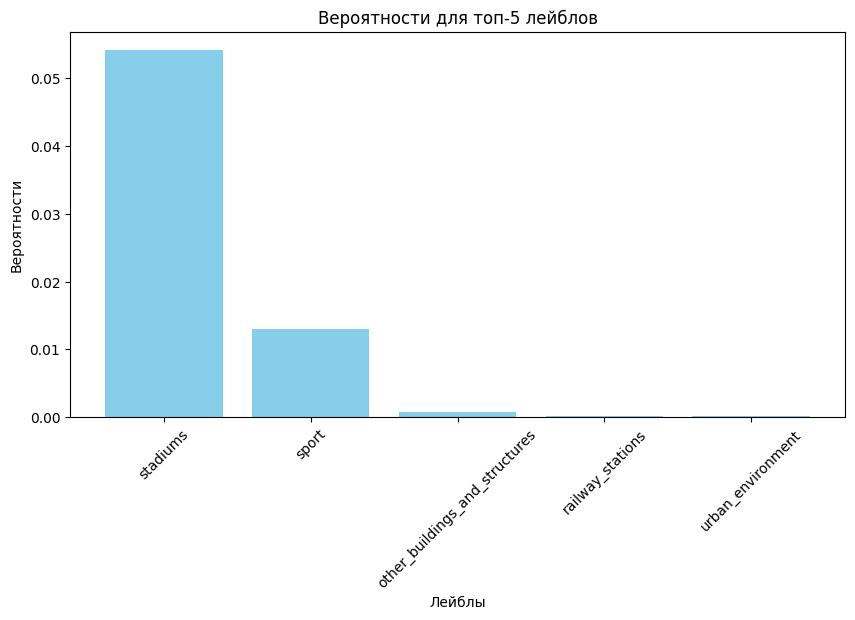

In [ ]:
# Получаем список вероятностей и лейблов из top_5_outputs
probabilities = [output["score"] for output in top_5_outputs]
labels = [output["label"] for output in top_5_outputs]

# Построение гистограммы
plt.figure(figsize=(10, 5))
plt.bar(labels, probabilities, color='skyblue')
plt.xlabel('Лейблы')
plt.ylabel('Вероятности')
plt.title('Вероятности для топ-5 лейблов')
plt.xticks(rotation=45)
plt.show()

# Создание модели классификации

## Модель resnet50

In [ ]:
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 165MB/s]


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# for param in model.parameters():
#   param.requires_grad = False

In [ ]:
for name, param in model.named_parameters():
    if not name.startswith('layer4') and not name.startswith('fc'):
        param.requires_grad = False

## Модель resnet101

In [ ]:
model = models.resnet101(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 97.2MB/s]


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
for name, param in model.named_parameters():
  if not name.startswith('layer4') and not name.startswith('fc'):
      param.requires_grad = False

## DataLoader

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, images, texts, transform=None):
      self.images = images
      self.texts = texts
      self.transform = transform

    def __len__(self):
      return len(self.images)

    def __getitem__(self, idx):
      image = self.images[idx]
      text = self.texts[idx]
      if self.transform:
          image = self.transform(image)

      return image, text

In [ ]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(10),
    transforms.RandomChoice([
            transforms.ColorJitter(hue=0.1),
            transforms.ColorJitter(brightness=0.2),
            transforms.ColorJitter(saturation=0.2),
            transforms.ColorJitter(contrast=0.2),
        ]),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

batch_size = 64

In [ ]:
X = merged_df['image']
y = merged_df['Name'].values

In [ ]:
images = [Image.open(BytesIO(base64.b64decode(bs4_url))).convert("RGB") for bs4_url in X]

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y_encoded = label_encoder.fit_transform(y)

In [ ]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
len(y_encoded)

15251

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(images, y_encoded, test_size=0.2, random_state=42)

In [ ]:
train_custom_dataset = CustomDataset(X_train, y_train, train_transform)
val_custom_dataset = CustomDataset(X_val, y_val, train_transform)

train_data_loader = DataLoader(train_custom_dataset, batch_size=batch_size, shuffle=True)
val_data_loader = DataLoader(val_custom_dataset, batch_size=batch_size, shuffle=False)

## Pipline

In [ ]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs, device):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    losses = {'train': [], "val": []}
    accuracies = {'train': [], "val": []}

    for epoch in trange(num_epochs, desc="Epoch:"):
        for phase in ['train', 'val']:
            if phase == 'train':
                # scheduler.step()
                model.train(True)
                data_loader = train_loader
            else:
                model.eval()
                data_loader = val_loader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in tqdm(data_loader, leave=False, desc=f"{phase} iter:"):
                inputs = inputs.to(device)
                labels = labels.to(device)


                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)


                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data).to(torch.float32).item()

            epoch_loss = running_loss / len(data_loader.dataset)
            epoch_acc = running_corrects / len(data_loader.dataset)

            losses[phase].append(epoch_loss)
            accuracies[phase].append(epoch_acc)

            tqdm.write('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    time_elapsed = time.time() - since
    print(f'Epoch: {epoch}')
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model, losses, accuracies

## Обучение модели

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
n_classes = len(np.unique(y_encoded))

In [ ]:
model.fc = torch.nn.Linear(model.fc.in_features, n_classes)

In [ ]:
model = model.to(device)

In [ ]:
num_epochs = 30

loss = torch.nn.CrossEntropyLoss()
# loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
model, losses, accuracies = train_model(model, loss, optimizer, train_data_loader, val_data_loader, num_epochs, device);

Epoch::   0%|          | 0/30 [00:00<?, ?it/s]

train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 5.2198 Acc: 0.0680


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 4.4075 Acc: 0.1278


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 3.7594 Acc: 0.2020


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 3.5484 Acc: 0.2461


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 3.0898 Acc: 0.3138


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 3.5047 Acc: 0.2701


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 2.6726 Acc: 0.3898


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.9265 Acc: 0.3559


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 2.4041 Acc: 0.4384


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.8328 Acc: 0.3854


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 2.1949 Acc: 0.4748


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.7061 Acc: 0.4113


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 2.0284 Acc: 0.5020


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.6375 Acc: 0.4205


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.8645 Acc: 0.5448


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.6446 Acc: 0.4146


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.7766 Acc: 0.5553


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.6085 Acc: 0.4333


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.6437 Acc: 0.5812


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5460 Acc: 0.4497


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.5728 Acc: 0.5962


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5546 Acc: 0.4595


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.4963 Acc: 0.6108


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5706 Acc: 0.4523


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.4214 Acc: 0.6280


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5324 Acc: 0.4595


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.3322 Acc: 0.6463


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5407 Acc: 0.4608


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.2690 Acc: 0.6631


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5846 Acc: 0.4520


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.2351 Acc: 0.6714


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5710 Acc: 0.4605


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.1757 Acc: 0.6793


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5337 Acc: 0.4635


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.1474 Acc: 0.6887


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.4712 Acc: 0.4726


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.1039 Acc: 0.7036


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5217 Acc: 0.4815


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.0490 Acc: 0.7109


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5519 Acc: 0.4759


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.0049 Acc: 0.7237


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5123 Acc: 0.4903


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 1.0078 Acc: 0.7228


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5511 Acc: 0.4779


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 0.9548 Acc: 0.7305


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.6187 Acc: 0.4707


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 0.9475 Acc: 0.7355


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5916 Acc: 0.4841


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 0.9077 Acc: 0.7428


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5565 Acc: 0.4907


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 0.9079 Acc: 0.7432


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5988 Acc: 0.4789


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 0.8744 Acc: 0.7512


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5985 Acc: 0.4726


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 0.8633 Acc: 0.7544


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5454 Acc: 0.4815


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 0.8341 Acc: 0.7625


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.6620 Acc: 0.4867


train iter::   0%|          | 0/191 [00:00<?, ?it/s]

train Loss: 0.8328 Acc: 0.7628


val iter::   0%|          | 0/48 [00:00<?, ?it/s]

val Loss: 2.5951 Acc: 0.4831
Epoch: 29
Training complete in 95m 38s
Best val Acc: 0.490659


In [ ]:
def plot_losses_and_accuracy(train_losses, val_losses, train_acc, val_acc):
    plt.figure(figsize=(10, 5))

    # Plot losses
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train')
    plt.plot(val_acc, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

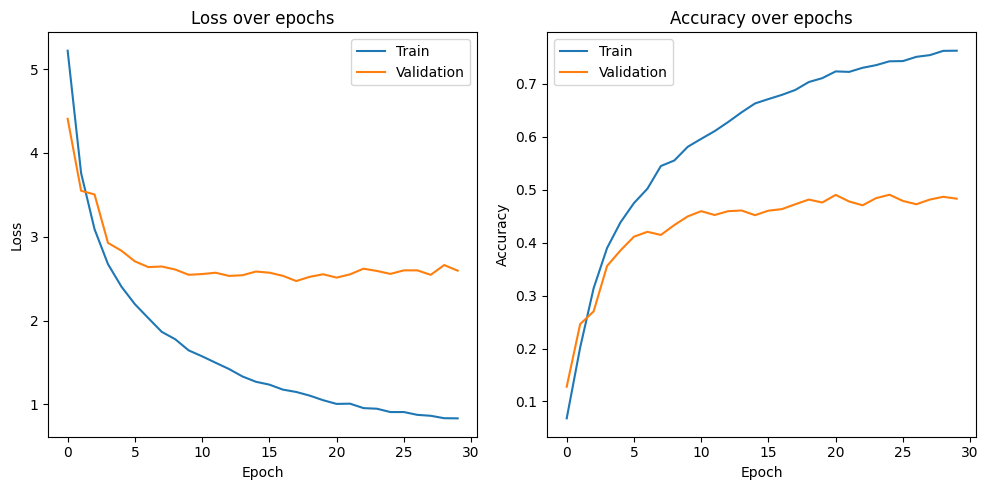

In [ ]:
plot_losses_and_accuracy(losses['train'], losses['val'], accuracies['train'], accuracies['val'])

In [ ]:
PATH = "resnet_101.pth"

torch.save(model.state_dict(), PATH)

## Выбор топ 5 подходящих мест

In [ ]:
# Создаем пустой список для хранения вероятностей классов
probabilities_list = []

for i, image in enumerate(X_val[:1]):
    image_tensor = test_transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = outputs.topk(5, 1)
        probabilities = torch.sigmoid(outputs).squeeze().tolist()  # Вероятности классов

    probabilities_list.append(probabilities)

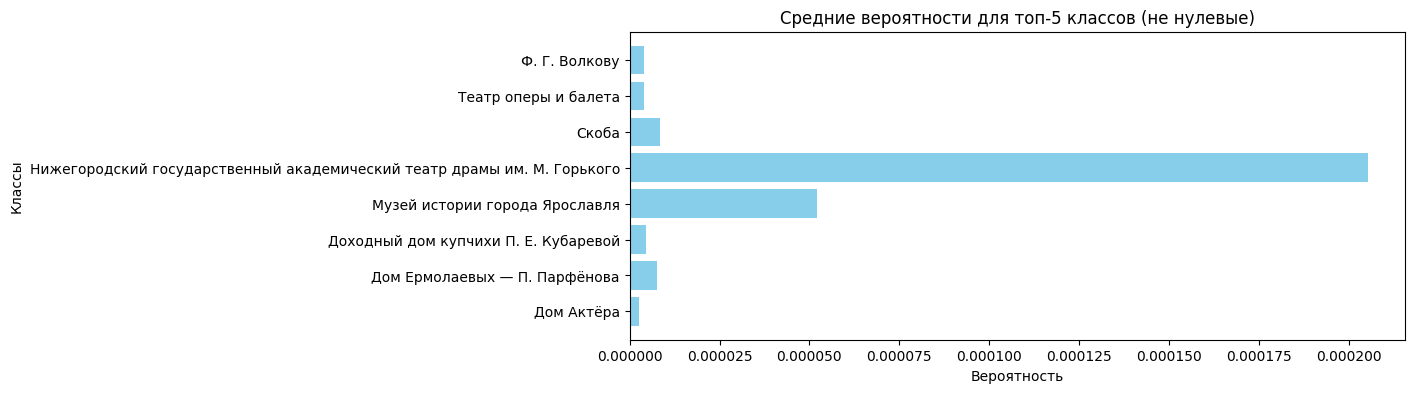

In [ ]:
# Отфильтруем классы с ненулевой вероятностью
nonzero_probabilities = [(label_encoder.inverse_transform([i])[0], mean_probabilities[i]) for i in range(len(mean_probabilities)) if mean_probabilities[i] >= 0.000001]

# Разделим классы и вероятности
classes, probabilities = zip(*nonzero_probabilities)

# Построение гистограммы
plt.figure(figsize=(10, len(classes)*0.5))
plt.barh(range(len(classes)), probabilities, color='skyblue')
plt.xlabel('Вероятность')
plt.ylabel('Классы')
plt.title('Средние вероятности для топ-5 классов (не нулевые)')
plt.yticks(range(len(classes)), classes)
plt.show()


In [ ]:
torch.save(model.state_dict(), 'model.pth')